In [1]:
# MODIFY! 
notebook_name = 'scaler'

# Import Libaries & Define Functions

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import glob
import re

In [3]:
sns.set(style='whitegrid')

In [4]:
def table_name(filename): 
    pattern = re.compile(r'\./[a-zA-Z0-9_.+-]+/([a-zA-Z0-9_.+-]+)\.csv')
    matches = pattern.findall(filename)
    
    for match in matches:
        return(match)

In [5]:
def frame_it(path):
    # path = f'./{directory}'
    csv_files = glob.glob(path + '/*.csv')
    df_list = []
    for filename in csv_files:
        # print(filename)
        df = pd.read_csv(filename, index_col=None, header=0)
        df['model-outliers-metric'] = table_name(filename)
        df_list.append(df)
        
    df = pd.concat(df_list, axis=0, ignore_index=False).reset_index(drop=True)
    df = df.rename({'Unnamed: 0':'metric'},axis=1)
    
    df['model-outliers-metric'] = df['model-outliers-metric'].map(str) + '-' + df['metric'].map(str)
    df = df.set_index('model-outliers-metric')
    # df = df.set_index(['model','metric'])
    df = df.drop('metric',axis=1)
    return df

In [6]:
def show_values_on_bars(axs, h_v="v", space=0.4,pct=False,neg=False):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                if pct == True: 
                    value = '{:.2%}'.format(p.get_height())
                else: 
                    value = '{:.2f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                if pct == True: 
                    value = '{:.2%}'.format(p.get_width())
                else: 
                    value = '{:.2f}'.format(p.get_width())
                if neg == True: 
                    ax.text(_x, _y, value, ha="right")
                else:
                    ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

# Analysis

In [7]:
# MODIFY!
df = frame_it('./scaler-err')

In [8]:
df.to_csv(f'./analysis/{notebook_name}.csv')

## ERR Values [MBit/s] and [(MBit/s)^2]

In [9]:
df.style.highlight_min(color = 'lightgrey', axis = 1).set_table_styles([{'selector': 'tr:hover','props': [('background-color', '')]}]).format('{:.2e}')

,MinMaxScaler(),RobustScaler(),StandardScaler()
model-outliers-metric,,,
poi-wo-MAE,5.32e+00,4.78e+00,4.58e+00
poi-wo-MSE,4.10e+01,3.49e+01,3.21e+01
poi-wo-RMSE,6.39e+00,5.89e+00,5.65e+00
poi-no-MAE,5.23e+00,4.76e+00,4.58e+00
poi-no-MSE,3.94e+01,3.46e+01,3.22e+01
poi-no-RMSE,6.27e+00,5.87e+00,5.67e+00
svr-no-MAE,4.70e+00,4.71e+00,4.89e+00
svr-no-MSE,3.40e+01,3.52e+01,3.88e+01
svr-no-RMSE,5.82e+00,5.93e+00,6.22e+00


## Performance Decline based on Best Performance [%]

In [10]:
df_min = df.apply(lambda value: -(value / df.min(axis=1)-1))

In [11]:
df_min.to_csv(f'./analysis/{notebook_name}-min.csv')

In [12]:
df_min.style.highlight_max(color = 'lightgrey', axis = 1).set_table_styles([{'selector': 'tr:hover','props': [('background-color', '')]}]).format('{:.2%}')

,MinMaxScaler(),RobustScaler(),StandardScaler()
model-outliers-metric,,,
poi-wo-MAE,-16.12%,-4.37%,-0.00%
poi-wo-MSE,-27.75%,-8.72%,-0.00%
poi-wo-RMSE,-13.13%,-4.32%,-0.00%
poi-no-MAE,-14.08%,-4.01%,-0.00%
poi-no-MSE,-22.41%,-7.50%,-0.00%
poi-no-RMSE,-10.65%,-3.64%,-0.00%
svr-no-MAE,-0.00%,-0.16%,-3.98%
svr-no-MSE,-0.00%,-3.58%,-13.96%
svr-no-RMSE,-0.00%,-1.76%,-6.74%


## Performance Increment based on Worst Performance [%]

In [13]:
df_pct_max = df.apply(lambda value: abs((value/df.max(axis=1) -1)))

In [14]:
df_pct_max.to_csv(f'./analysis/{notebook_name}-max.csv')

In [15]:
df_pct_max.style.highlight_max(color = 'lightgrey', axis = 1).set_table_styles([{'selector': 'tr:hover','props': [('background-color', '')]}]).format('{:.2%}')

,MinMaxScaler(),RobustScaler(),StandardScaler()
model-outliers-metric,,,
poi-wo-MAE,0.00%,10.11%,13.88%
poi-wo-MSE,0.00%,14.90%,21.72%
poi-wo-RMSE,0.00%,7.78%,11.60%
poi-no-MAE,0.00%,8.82%,12.34%
poi-no-MSE,0.00%,12.18%,18.31%
poi-no-RMSE,0.00%,6.34%,9.63%
svr-no-MAE,3.83%,3.68%,0.00%
svr-no-MSE,12.25%,9.11%,0.00%
svr-no-RMSE,6.31%,4.66%,0.00%


# Visualization (RMSE based)

In [16]:
models = ['poi', 'svr', 'lin', 'rf']
model_df_list = []

for i, model in enumerate(models): 
    df_ = df.loc[[
        f'{model}-wo-RMSE', 
        f'{model}-no-RMSE',
    ]]
    model_df_list.append(df_)

In [17]:
model_df_list[0]

,MinMaxScaler(),RobustScaler(),StandardScaler()
model-outliers-metric,,,
poi-wo-RMSE,6.391279,5.893818,5.649586
poi-no-RMSE,6.269390,5.871890,5.665851


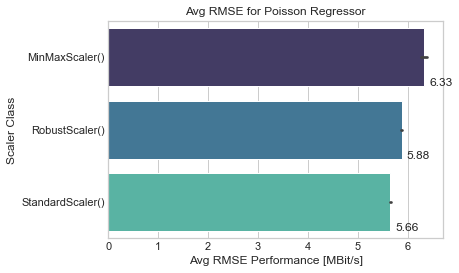

In [18]:
ax = sns.barplot(data=model_df_list[0],orient='h',palette='mako')
show_values_on_bars(ax, "h", 0.1)
ax.set(ylabel='Scaler Class',xlabel='Avg RMSE Performance [MBit/s]')
ax.tick_params(axis=u'both', which=u'both',length=0)

ax.set_title('Avg RMSE for Poisson Regressor');

In [19]:
model_df_list[1]

,MinMaxScaler(),RobustScaler(),StandardScaler()
model-outliers-metric,,,
svr-wo-RMSE,5.873964,6.540923,6.193866
svr-no-RMSE,5.823229,5.925674,6.215588


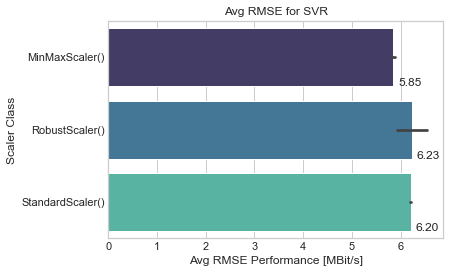

In [20]:
ax = sns.barplot(data=model_df_list[1],orient='h',palette='mako')
show_values_on_bars(ax, "h", 0.1)
ax.set(ylabel='Scaler Class',xlabel='Avg RMSE Performance [MBit/s]')
ax.tick_params(axis=u'both', which=u'both',length=0)

ax.set_title('Avg RMSE for SVR');

In [21]:
model_df_list[2]

,MinMaxScaler(),RobustScaler(),StandardScaler()
model-outliers-metric,,,
lin-wo-RMSE,2.209903e+12,5.588092e+00,2.598866e+13
lin-no-RMSE,2.510818e+12,4.147761e+11,8.689518e+13


In [22]:
# ax = sns.barplot(data=model_df_list[2],orient='h',palette='mako')
# show_values_on_bars(ax, "h", 0.1)
# ax.set(ylabel='Scaler Class',xlabel='Avg RMSE Performance [MBit/s]')
# 
# ax.set_title('Avg RMSE for Linear Regressor');

In [23]:
model_df_list[3]

,MinMaxScaler(),RobustScaler(),StandardScaler()
model-outliers-metric,,,
rf-wo-RMSE,3.908447,3.874692,3.881379
rf-no-RMSE,3.861571,3.865310,3.851702


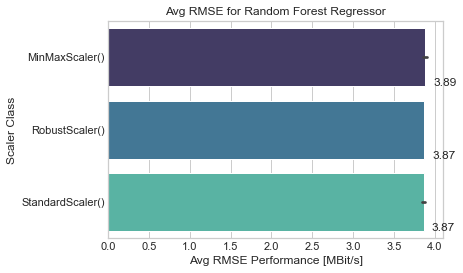

In [24]:
ax = sns.barplot(data=model_df_list[3],orient='h',palette='mako')
show_values_on_bars(ax, "h", 0.1)
ax.set(ylabel='Scaler Class',xlabel='Avg RMSE Performance [MBit/s]')
ax.tick_params(axis=u'both', which=u'both',length=0)

ax.set_title('Avg RMSE for Random Forest Regressor');

# Visualization (RMSE [%])

In [25]:
models = ['poi', 'svr', 'lin', 'rf']
model_df_min_list = []

for i, model in enumerate(models): 
    df_ = df_min.loc[[
        f'{model}-wo-RMSE', 
        f'{model}-no-RMSE',
    ]]
    model_df_min_list.append(df_)

In [26]:
model_df_min_list[0]

,MinMaxScaler(),RobustScaler(),StandardScaler()
model-outliers-metric,,,
poi-wo-RMSE,-0.131283,-0.043230,-0.0
poi-no-RMSE,-0.106522,-0.036365,-0.0


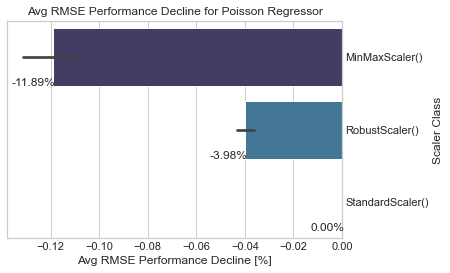

In [27]:
ax = sns.barplot(data=model_df_min_list[0],orient='h',palette='mako')
ax.set(ylabel='Scaler Class',xlabel='Avg RMSE Performance Decline [%]')

ax.yaxis.set_label_position("right")
ax.yaxis.set_ticks_position("right")
ax.tick_params(axis=u'both', which=u'both',length=0)

show_values_on_bars(ax,"h",0.001,True,True)

ax.set_title('Avg RMSE Performance Decline for Poisson Regressor');

In [28]:
model_df_min_list[1]

,MinMaxScaler(),RobustScaler(),StandardScaler()
model-outliers-metric,,,
svr-wo-RMSE,-0.0,-0.113545,-0.054461
svr-no-RMSE,-0.0,-0.017593,-0.067378


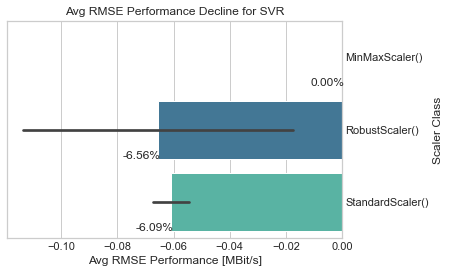

In [29]:
ax = sns.barplot(data=model_df_min_list[1],orient='h',palette='mako')
ax.set(ylabel='Scaler Class',xlabel='Avg RMSE Performance [MBit/s]')

ax.yaxis.set_label_position("right")
ax.yaxis.set_ticks_position("right")
ax.tick_params(axis=u'both', which=u'both',length=0)

show_values_on_bars(ax,"h",0.001,True,True)

ax.set_title('Avg RMSE Performance Decline for SVR');

In [30]:
model_df_min_list[2]

,MinMaxScaler(),RobustScaler(),StandardScaler()
model-outliers-metric,,,
lin-wo-RMSE,-3.954665e+11,-0.0,-4.650721e+12
lin-no-RMSE,-5.053429e+00,-0.0,-2.084990e+02


In [31]:
# ax = sns.barplot(data=model_df_min_list[2],orient='h',palette='mako')
# show_values_on_bars(ax, "h", 0.001)
# ax.set(ylabel='Scaler Class',xlabel='Avg RMSE Performance [MBit/s]')
# 
# ax.set_title('Avg RMSE Performance Decline for Poisson Regressor');

In [32]:
model_df_min_list[3]

,MinMaxScaler(),RobustScaler(),StandardScaler()
model-outliers-metric,,,
rf-wo-RMSE,-0.008711,-0.000000,-0.001726
rf-no-RMSE,-0.002562,-0.003533,-0.000000


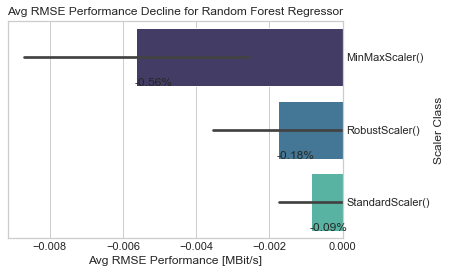

In [33]:
ax = sns.barplot(data=model_df_min_list[3],orient='h',palette='mako')
ax.set(ylabel='Scaler Class',xlabel='Avg RMSE Performance [MBit/s]')

ax.yaxis.set_label_position("right")
ax.yaxis.set_ticks_position("right")
ax.tick_params(axis=u'both', which=u'both',length=0)

show_values_on_bars(ax,"h",0.001,True,True)

ax.set_title('Avg RMSE Performance Decline for Random Forest Regressor');

DONE!